In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Global Economy Indicators.csv")
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [3]:
df.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [5]:
top5GDP = df.groupby(" Country ")[" Gross Domestic Product (GDP) "].mean().sort_values(ascending=False).head()
print(top5GDP)

 Country 
United States      9.321346e+12
Japan              3.417731e+12
China              3.372873e+12
Germany            2.095904e+12
United Kingdom     1.515096e+12
Name:  Gross Domestic Product (GDP) , dtype: float64


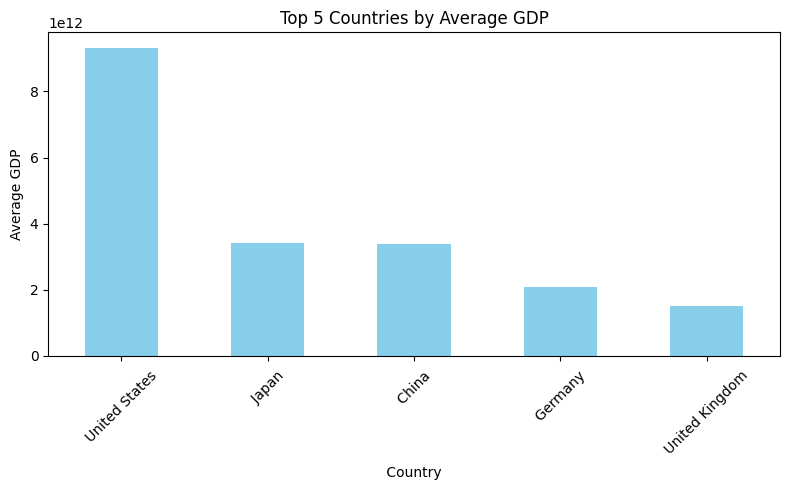

In [6]:
plt.figure(figsize=(8, 5))
top5GDP.plot(kind='bar', title='Top 5 Countries by Average GDP', color='skyblue')
plt.ylabel('Average GDP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
top5EXP = df.groupby(" Country ")[" Household consumption expenditure (including Non-profit institutions serving households) "].mean().sort_values(ascending=False).head()
top5EXP

 Country 
United States      6.194904e+12
Japan              1.855017e+12
China              1.297197e+12
Germany            1.149846e+12
United Kingdom     9.833152e+11
Name:  Household consumption expenditure (including Non-profit institutions serving households) , dtype: float64

<Figure size 1000x500 with 0 Axes>

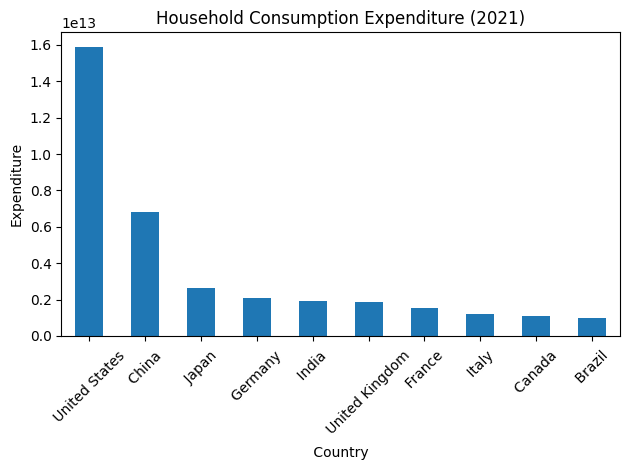

In [8]:
latest_year = df[' Year '].max()
household_latest = df[df[' Year '] == latest_year][[' Country ', ' Household consumption expenditure (including Non-profit institutions serving households) ']]
household_latest = household_latest.sort_values(by=' Household consumption expenditure (including Non-profit institutions serving households) ', ascending=False).dropna()

# Plot
plt.figure(figsize=(10, 5))
household_latest.set_index(' Country ').head(10).plot(kind='bar', legend=False, title=f'Household Consumption Expenditure ({latest_year})')
plt.ylabel('Expenditure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
top10GDP = df.groupby(" Country ")[" Gross Domestic Product (GDP) "].mean().sort_values(ascending=False).head(10)
print(top10GDP)

 Country 
United States          9.321346e+12
Japan                  3.417731e+12
China                  3.372873e+12
Germany                2.095904e+12
United Kingdom         1.515096e+12
France                 1.507346e+12
Italy                  1.200442e+12
Russian Federation     1.034375e+12
Brazil                 8.450019e+11
Canada                 8.358121e+11
Name:  Gross Domestic Product (GDP) , dtype: float64


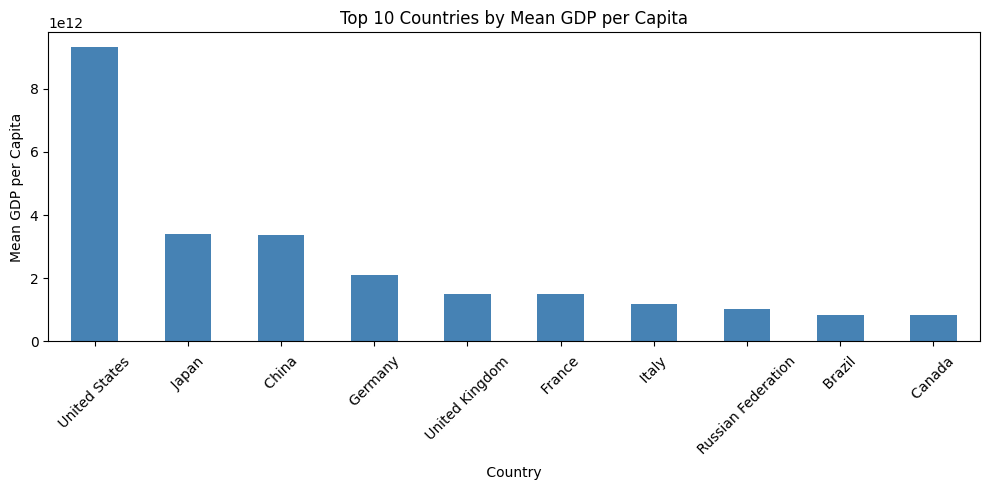

In [11]:
plt.figure(figsize=(10, 5))
top10GDP.plot(kind='bar', color='steelblue', title='Top 10 Countries by Mean GDP per Capita')
plt.ylabel('Mean GDP per Capita')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
imports = df.groupby(" Country ")[" Imports of goods and services "].max().sort_values(ascending=False).head()
imports

 Country 
United States      3.400000e+12
China              3.060000e+12
Germany            1.780000e+12
Japan              1.010000e+12
United Kingdom     9.430000e+11
Name:  Imports of goods and services , dtype: float64

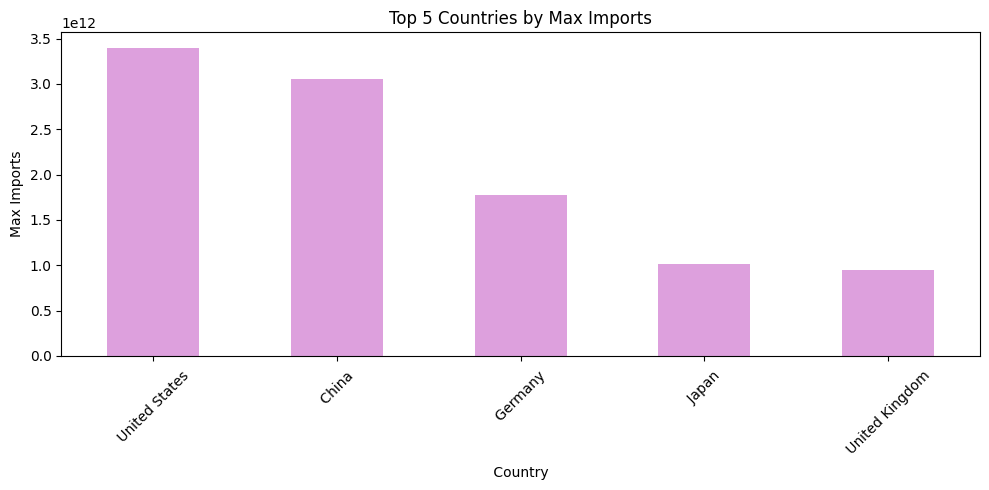

In [13]:
plt.figure(figsize=(10, 5))
imports.plot(kind='bar', color='plum', title='Top 5 Countries by Max Imports')
plt.ylabel('Max Imports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
exports = df.groupby(" Country ")[" Exports of goods and services "].sum().sort_values(ascending=False).head(20)

exports


 Country 
United States            5.313078e+13
Germany                  3.895194e+13
China                    3.887656e+13
Japan                    2.353011e+13
United Kingdom           2.134007e+13
France                   2.081512e+13
Netherlands              1.642795e+13
Italy                    1.582017e+13
Canada                   1.384602e+13
Republic of Korea        1.271416e+13
China, Hong Kong SAR     1.249986e+13
Singapore                1.162426e+13
Belgium                  1.021704e+13
Switzerland              1.010410e+13
Spain                    9.894634e+12
Russian Federation       9.681837e+12
Mexico                   8.599707e+12
India                    8.025313e+12
Ireland                  6.891373e+12
Saudi Arabia             6.490638e+12
Name:  Exports of goods and services , dtype: float64

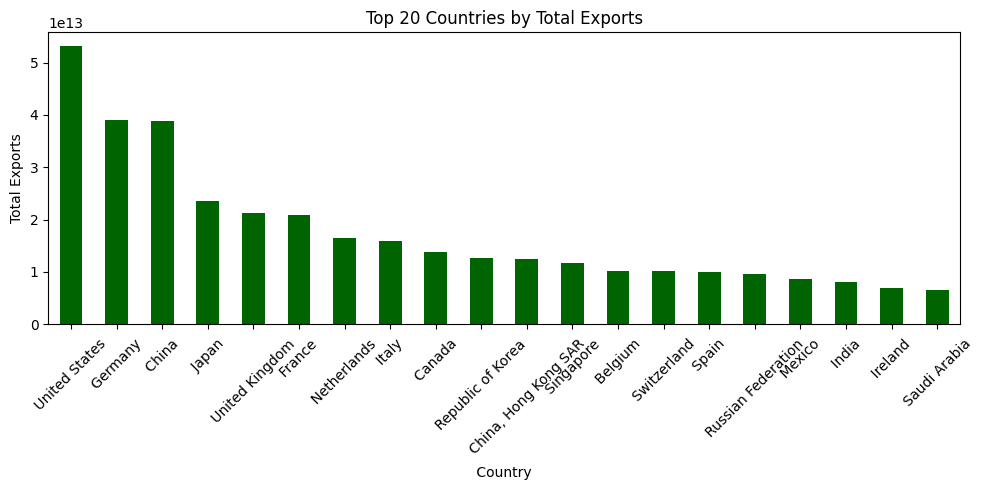

In [15]:
plt.figure(figsize=(10, 5))
exports.plot(kind='bar', color='darkgreen', title='Top 20 Countries by Total Exports')
plt.ylabel('Total Exports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()